<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects%20for%20Beginners/Extreme_Learning_Machine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
#Define the EML model
class ELM(object):

    def __init__(self, inputSize, outputSize, hiddenSize):
        """
        Initialize weight and bias between input layer and hidden layer
        Parameters:
        inputSize: int
            The number of input layer dimensions or features in the training data
        outputSize: int
            The number of output layer dimensions
        hiddenSize: int
            The number of hidden layer dimensions
        """

        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize

        # Initialize random weight with range [-0.5, 0.5]
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

        # Initialize random bias with range [0, 1]
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))

        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        """
        Sigmoid activation function

        Parameters:
        x: array-like or matrix
            The value that the activation output will look for
        Returns:
            The results of activation using sigmoid function
        """
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        """
        Predict the results of the training process using test data
        Parameters:
        X: array-like or matrix
            Test data that will be used to determine output using ELM
        Returns:
            Predicted results or outputs from test data
        """
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

        return y

    def fit(self, X, y):
        """
        Extreme Learning Machine training process
        Parameters:
        X: array-like or matrix
            Training data that contains the value of each feature
        y: array-like or matrix
            Training data that contains the value of the target (class)
        Returns:
            The results of the training process
        """

        X = np.matrix(X)
        y = np.matrix(y)

        # Calculate hidden layer output matrix (Hinit)
        self.H = (X * self.weight.T) + self.bias

        # Sigmoid activation function
        self.H = self.sigmoid(self.H)

        # Calculate the Moore-Penrose pseudoinverse matriks
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

        # Calculate the output weight matrix beta
        self.beta = H_moore_penrose * y

        return self.H * self.beta

In [3]:
#load dataset
dataset = datasets.make_classification(1000)
dataset

(array([[ 0.69088647,  0.78518197, -0.07782891, ..., -0.96843813,
         -0.16275706, -0.47043722],
        [-0.01712549,  0.2143697 , -0.6988573 , ...,  0.09952446,
         -0.62030146, -1.75300612],
        [ 1.27222432, -0.69453322, -1.35128012, ..., -0.98597587,
         -1.20016929,  0.21594991],
        ...,
        [-0.29849168, -0.31150429, -0.57907179, ...,  1.98495959,
          0.27541333, -0.84949026],
        [-0.63834621,  1.65030926, -0.78137906, ...,  0.53594238,
         -0.71534219, -0.25391532],
        [-1.0186821 , -0.41436387,  0.2047514 , ..., -0.13453465,
          0.92468793, -1.38634774]]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
   

In [4]:
elm = ELM(dataset[0].shape[1], 2, 20)
elm

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(800, 20) (200, 20)


In [6]:
elm.fit(X_train, y_train.reshape(-1,1))

matrix([[ 0.34151748],
        [ 0.1374322 ],
        [ 0.19373381],
        [ 0.48170373],
        [ 0.62434366],
        [ 0.51551042],
        [ 0.70260721],
        [-0.09088123],
        [ 0.6866885 ],
        [ 0.5905128 ],
        [ 0.77027386],
        [ 0.26446337],
        [ 0.59999356],
        [-0.0131555 ],
        [ 0.57488588],
        [-0.03233018],
        [ 0.49297268],
        [ 0.67554743],
        [ 0.12062465],
        [ 0.3497055 ],
        [ 0.09610764],
        [ 0.12933172],
        [ 0.07172608],
        [ 0.92651181],
        [ 0.71196556],
        [ 0.21810744],
        [ 0.1296221 ],
        [ 0.07288941],
        [ 0.82885975],
        [ 0.23340043],
        [ 0.76435089],
        [ 0.08766786],
        [ 0.72708006],
        [ 0.20060167],
        [ 0.25515991],
        [ 0.86308157],
        [ 1.04108878],
        [ 0.62944716],
        [ 0.71936124],
        [ 0.12699369],
        [ 1.0942076 ],
        [ 0.33764265],
        [ 0.76084824],
        [ 0

In [7]:
#check accuracy score on training data
y_pred = elm.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_train, np.asarray(y_pred))
print("Accuracy on training data is: ", acc)

Accuracy on training data is:  0.9025


In [8]:
#check f1 score on training data
f1 = f1_score(y_train, np.asarray(y_pred))
print("Accuracy on training data is: ", f1)

Accuracy on training data is:  0.9037037037037037


In [9]:
#check accuracy score on test data
y_pred = elm.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, np.asarray(y_pred))
print("Accuracy on test data is: ", acc)

Accuracy on test data is:  0.9


In [10]:
#check f1 score on test data
f1 = f1_score(y_test, np.asarray(y_pred))
print("Accuracy on test data is: ", f1)

Accuracy on test data is:  0.8901098901098902


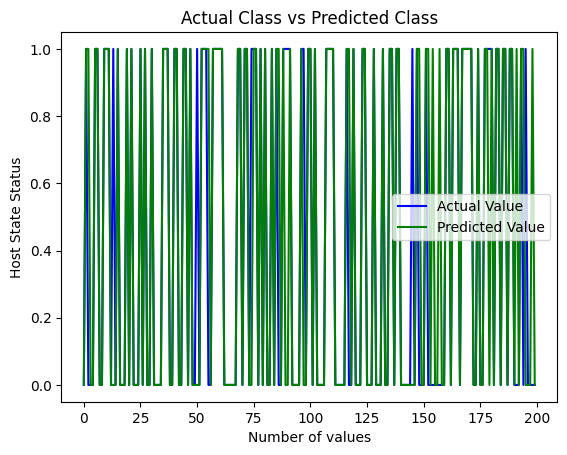

In [13]:
y_test =list(y_test)
plt.plot(y_test, color="blue", label="Actual Value")
plt.plot(y_pred, color="green", label="Predicted Value")
plt.title("Actual Class vs Predicted Class")
plt.xlabel("Number of values")
plt.ylabel("Host State Status")
plt.legend()
plt.show()